
# <span style="color:rgb(213,80,0)">Analysis of transformed Airline data.</span>

This file creates Figures A.50\-52


In [1]:
prin=0;

## Data loading

the original airline data (not contaminated)


In [2]:
airlines = ...
    [112  115  145  171  196  204  242  284  315  340  360  417    % Jan
    118  126  150  180  196  188  233  277  301  318  342  391    % Feb
    132  141  178  193  236  235  267  317  356  362  406  419    % Mar
    129  135  163  181  235  227  269  313  348  348  396  461    % Apr
    121  125  172  183  229  234  270  318  355  363  420  472    % May
    135  149  178  218  243  264  315  374  422  435  472  535    % Jun
    148  170  199  230  264  302  364  413  465  491  548  622    % Jul
    148  170  199  242  272  293  347  405  467  505  559  606    % Aug
    136  158  184  209  237  259  312  355  404  404  463  508    % Sep
    119  133  162  191  211  229  274  306  347  359  407  461    % Oct
    104  114  146  172  180  203  237  271  305  310  362  390    % Nov
    118  140  166  194  201  229  278  306  336  337  405  432 ]; % Dec
Y=(airlines(:));

## Create Figure A.50

the model


In [3]:
model           = struct;
model.trend     = 1;     % linear trend
model.seasonal  = 102;   % two harmonics with time varying seasonality
model.s         = 12;    % monthly time series
model.lshift    = 0;     % no level shift

% Default h is round(nT*0.75), i.e 25% breakdown point
outLTS102 = LTSts(Y,'model',model,'plots',1,'conflev',0.99,'msg',0,'dispresults',true);

                 Coeff         SE           t          pval    
                ________    _________    _______    ___________
    b_trend1      91.938       2.7857     33.004     4.5293e-67
    b_trend2      2.5618     0.037112      69.03    2.5889e-108
    b_cos1       -12.804       3.4601    -3.7003     0.00031092
    b_sin1       -4.9348       1.4235    -3.4667     0.00070412
    b_cos2       -1.9724      0.94193    -2.0939       0.038107
    b_sin2        7.2621       2.0015     3.6282     0.00040175
    b_varaml    0.023209    0.0096031     2.4168       0.016975


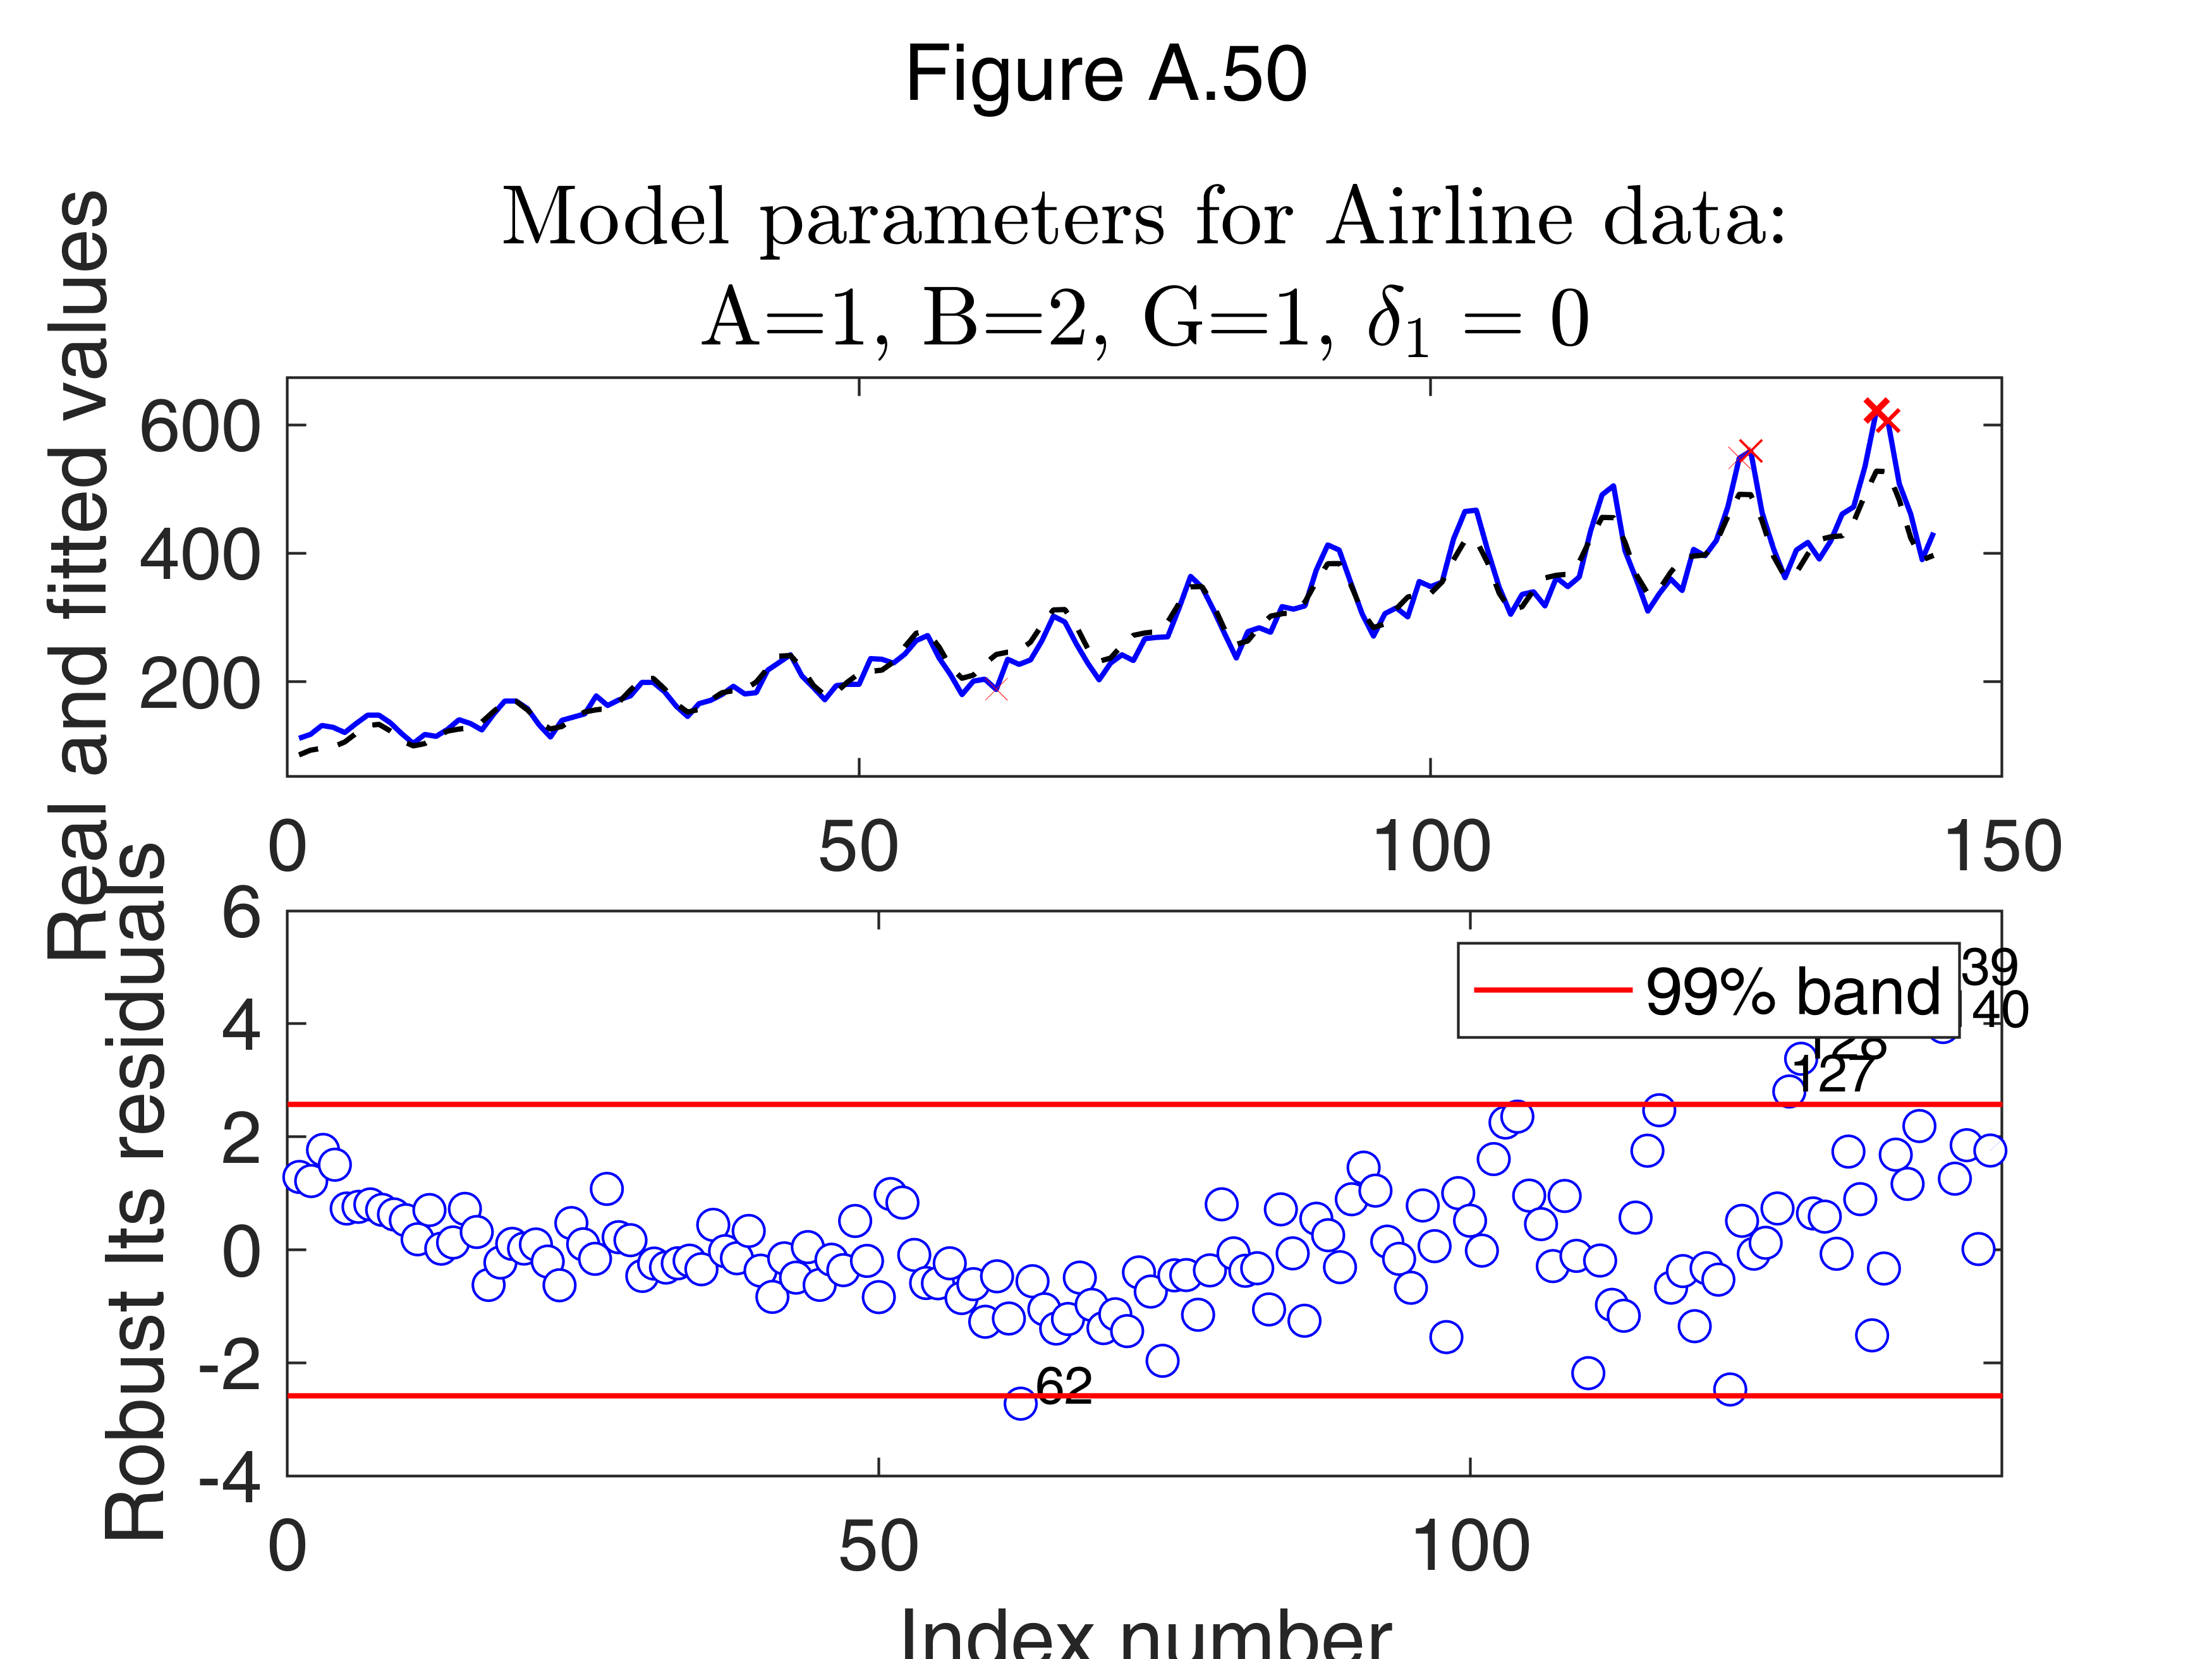

In [4]:
titl = {'Model parameters for Airline data:' , 'A=1, B=2, G=1,  !!!EQ_1!!! '};
title(findobj(gcf,'Tag','LTSts:ts'),titl,'interpreter','LaTeX','FontSize',16);

if prin==1
    % print to postscript
    print -depsc ch8_problem5_102.eps;
else
    sgtitle('Figure A.50')
    set(gcf,"Name",'Figure A.50')
end

## Create Figure A.51

quadratic grow of amplitude


In [5]:
model.seasonal  = 202;
outLTS202 = LTSts(Y,'model',model,'plots',1,'conflev',0.99,'msg',0,'dispresults',true);

                  Coeff           SE           t          pval   
                __________    __________    _______    __________
    b_trend1         101.8        2.5324     40.198    2.3663e-77
    b_trend2        2.2873      0.042586     53.711    1.8869e-93
    b_cos1         -21.104        4.6498    -4.5387    1.2328e-05
    b_sin1          -4.315        1.0844    -3.9791    0.00011197
    b_cos2         -5.6987        1.3804    -4.1285    6.3363e-05
    b_sin2           9.088        2.0612     4.4091    2.0914e-05
    b_varaml     -0.018191     0.0044528    -4.0853    7.4796e-05
    b_varam2    0.00047986    7.6471e-05      6.275    4.3582e-09


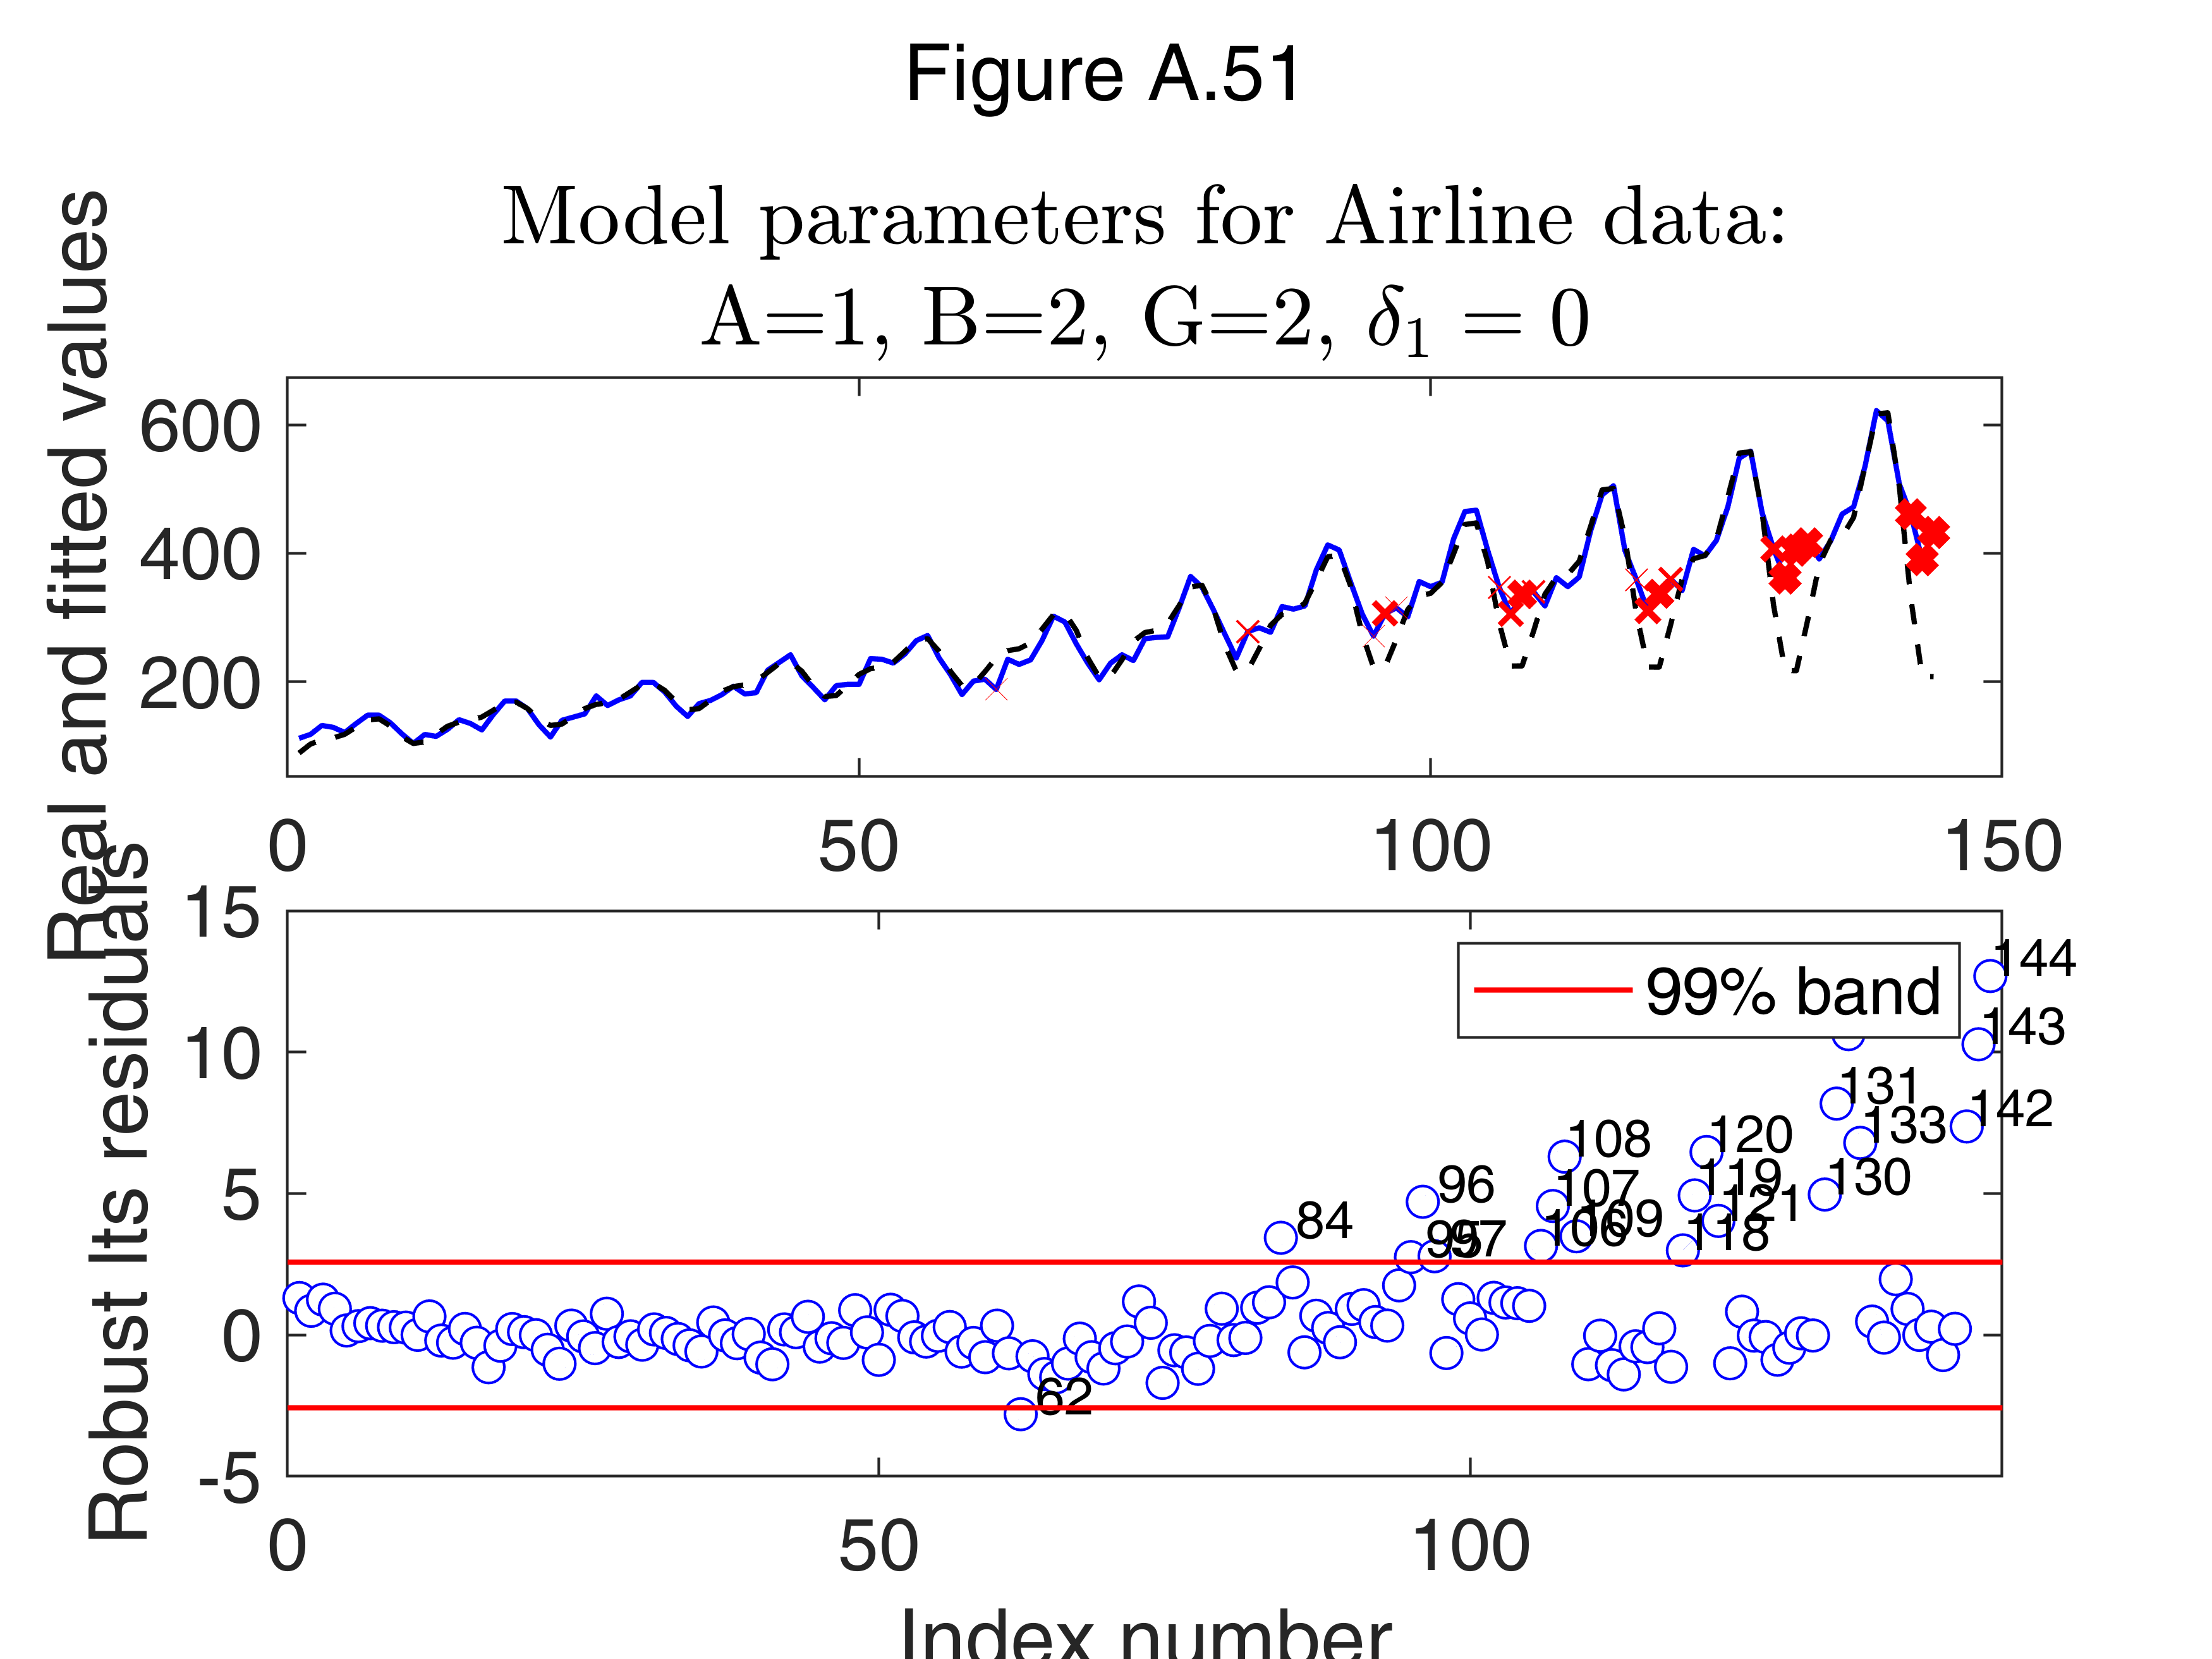

In [6]:
titl = {'Model parameters for Airline data:' , 'A=1, B=2, G=2,  !!!EQ_1!!! '};
title(findobj(gcf,'Tag','LTSts:ts'),titl,'interpreter','LaTeX','FontSize',16);

if prin==1
    % print to postscript
    print -depsc ch8_problem5_202.eps;
else
    sgtitle('Figure A.51')
    set(gcf,"Name",'Figure A.51')
end

## Create Figure A.52 (left panel)

Transform the data and go back to linear grow of amplitude


In [7]:
model.seasonal  = 102;
Ylog = log(Y);
outLTSlog102 = LTSts(Ylog,'model',model,'plots',1,'conflev',0.99,'msg',0,'dispresults',true);

                  Coeff          SE           t          pval    
                _________    __________    _______    ___________
    b_trend1       4.8155      0.010127     475.49    2.5795e-222
    b_trend2     0.010092    0.00012154     83.032    4.7868e-119
    b_cos1      -0.094217      0.012374    -7.6139     3.9027e-12
    b_sin1      -0.034365     0.0062817    -5.4707     2.0641e-07
    b_cos2      -0.013591     0.0052364    -2.5955       0.010476
    b_sin2       0.057173      0.008707     6.5663     9.8566e-10
    b_varaml    0.0056688     0.0021484     2.6386      0.0092889


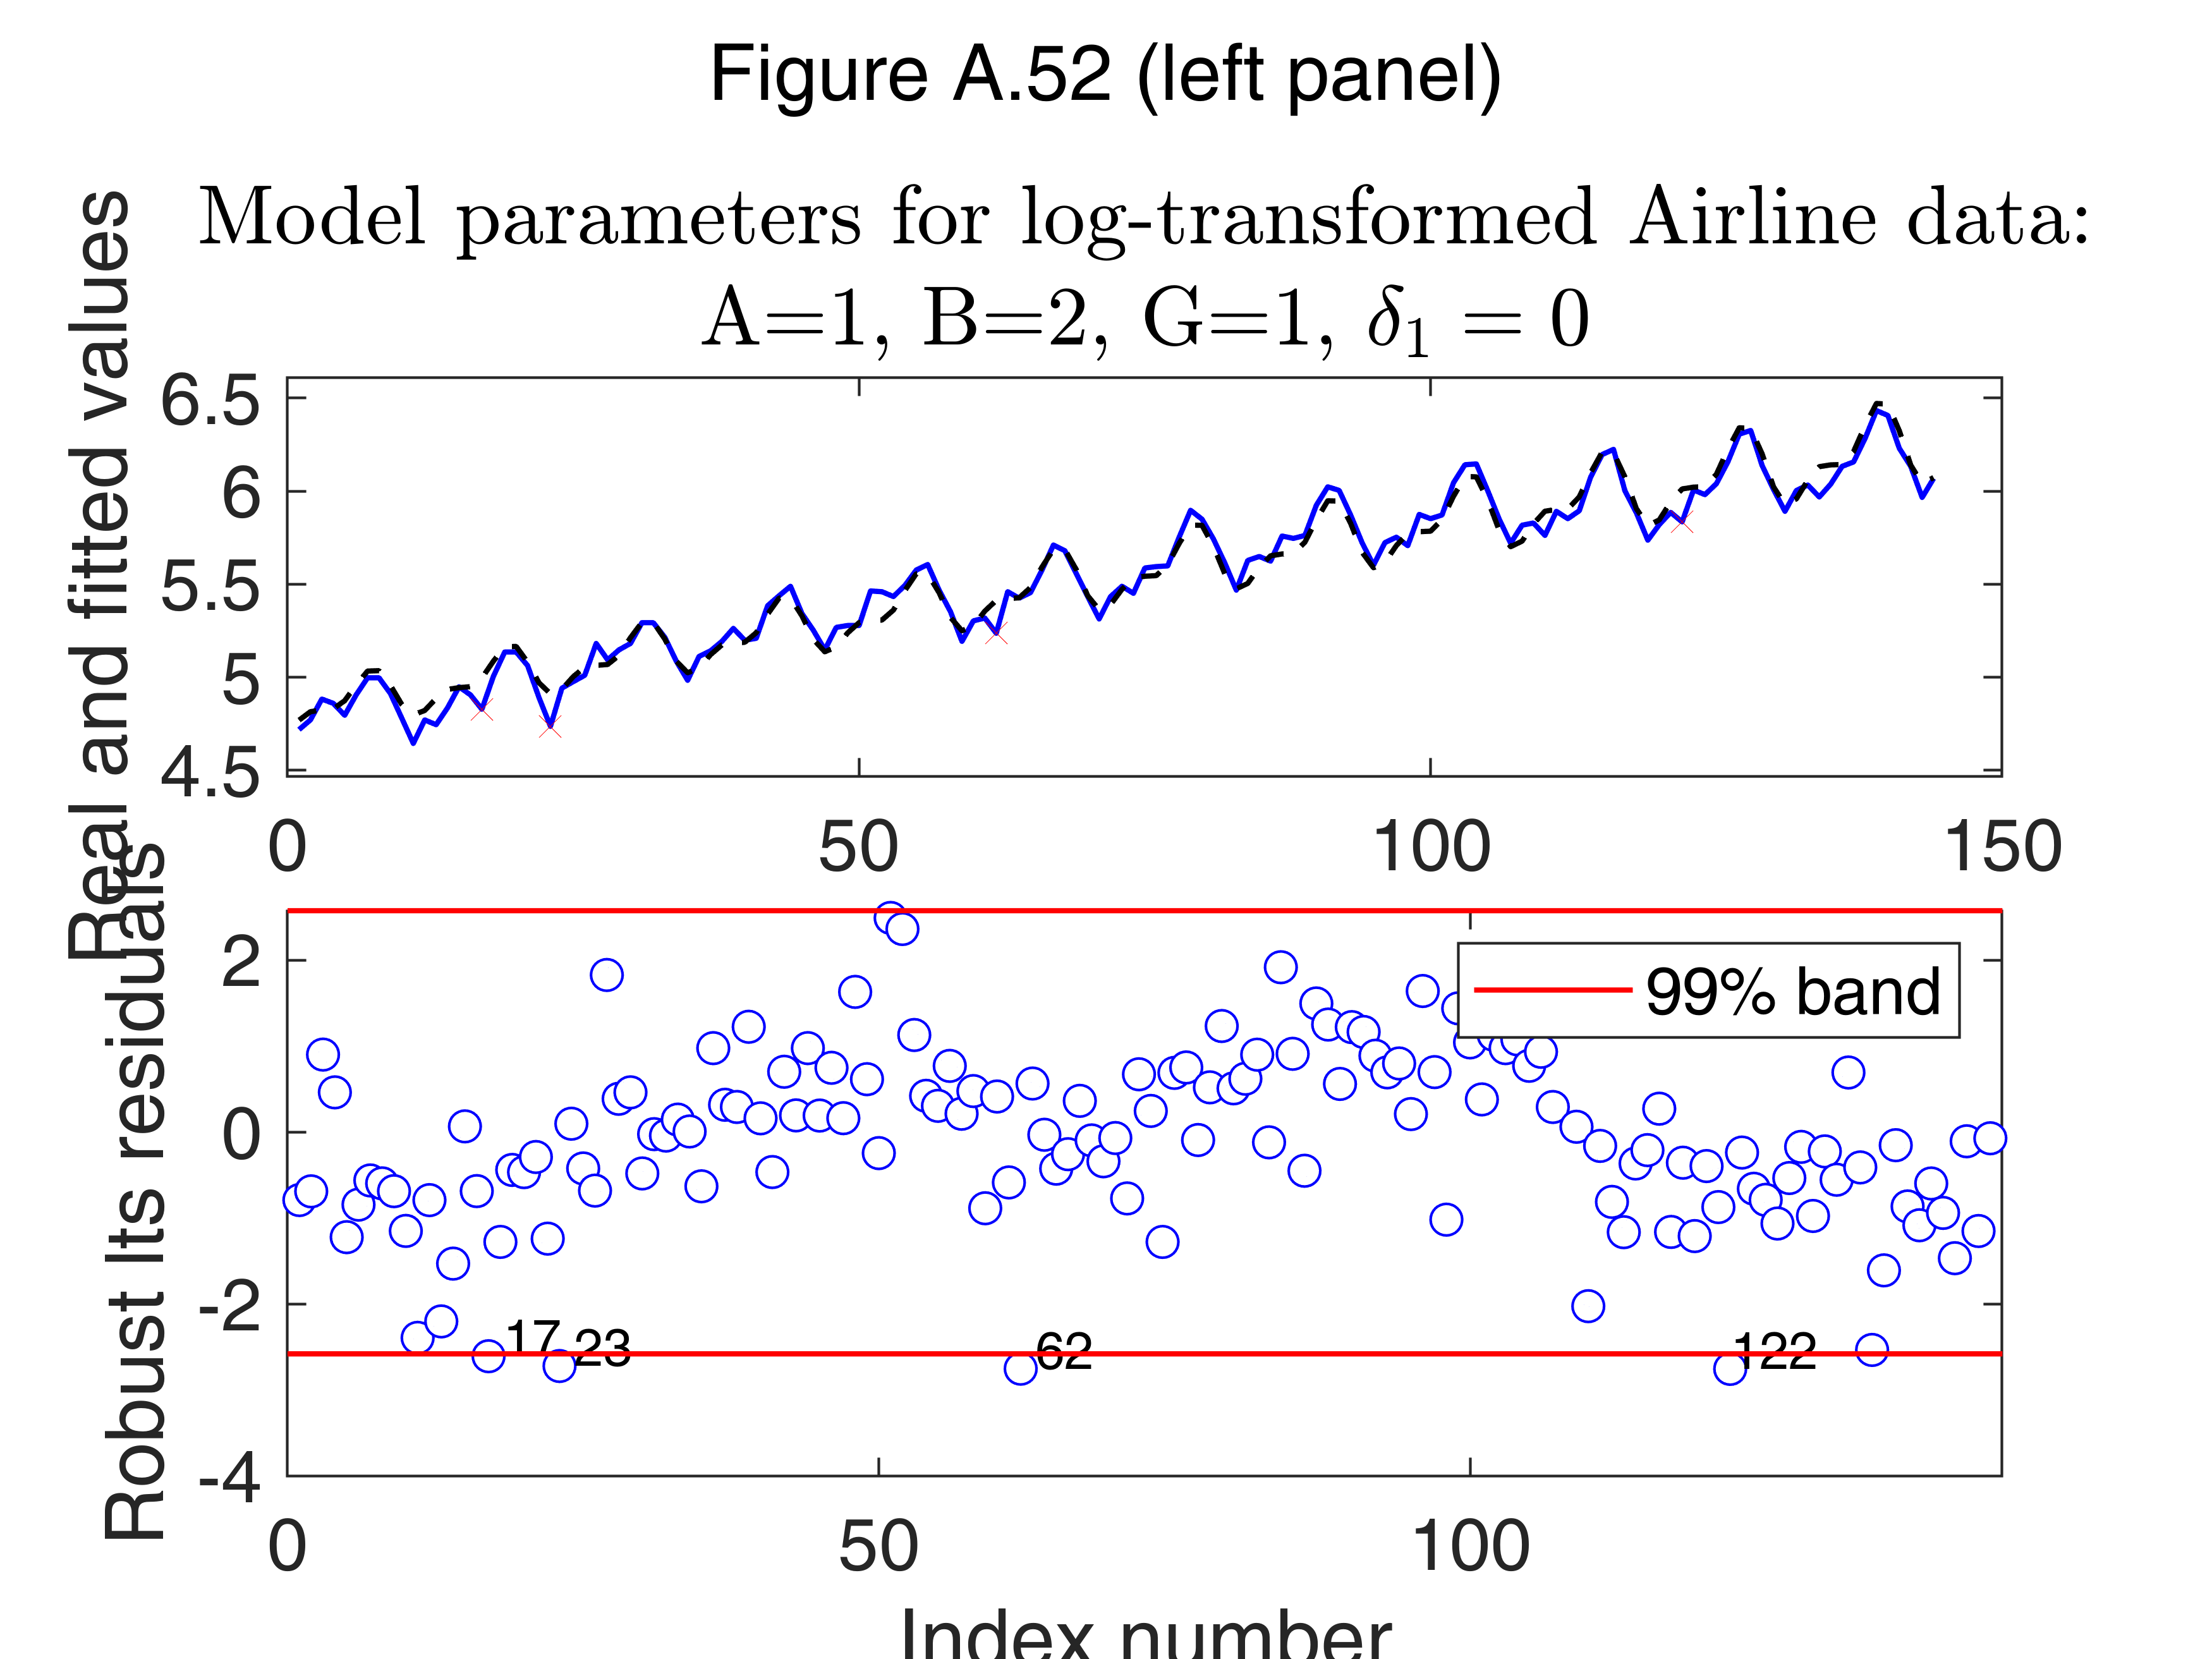

In [8]:
titl = {'Model parameters for log-transformed Airline data:' , 'A=1, B=2, G=1,  !!!EQ_1!!! '};
title(findobj(gcf,'Tag','LTSts:ts'),titl,'interpreter','LaTeX','FontSize',16);

if prin==1
    % print to postscript
    print -depsc ch8_problem5_log102;
else
    sgtitle('Figure A.52 (left panel)')
    set(gcf,"Name",'Figure A.52 (left panel)')
end

## Create Figure A.52 (right panel)

No grow of amplitude


In [9]:
model.seasonal  = 2;
outLTSlog2 = LTSts(Ylog,'model',model,'plots',1,'conflev',0.99,'msg',0,'dispresults',true);

                  Coeff          SE           t          pval    
                _________    __________    _______    ___________
    b_trend1       4.8154      0.012954     371.73    5.7856e-209
    b_trend2     0.010042    0.00015511     64.741    3.7706e-105
    b_cos1       -0.14396     0.0090948    -15.829     8.0168e-33
    b_sin1      -0.048199     0.0091119    -5.2897      4.692e-07
    b_cos2      -0.021526     0.0090948    -2.3669       0.019327
    b_sin2       0.076452     0.0090974     8.4037      4.747e-14


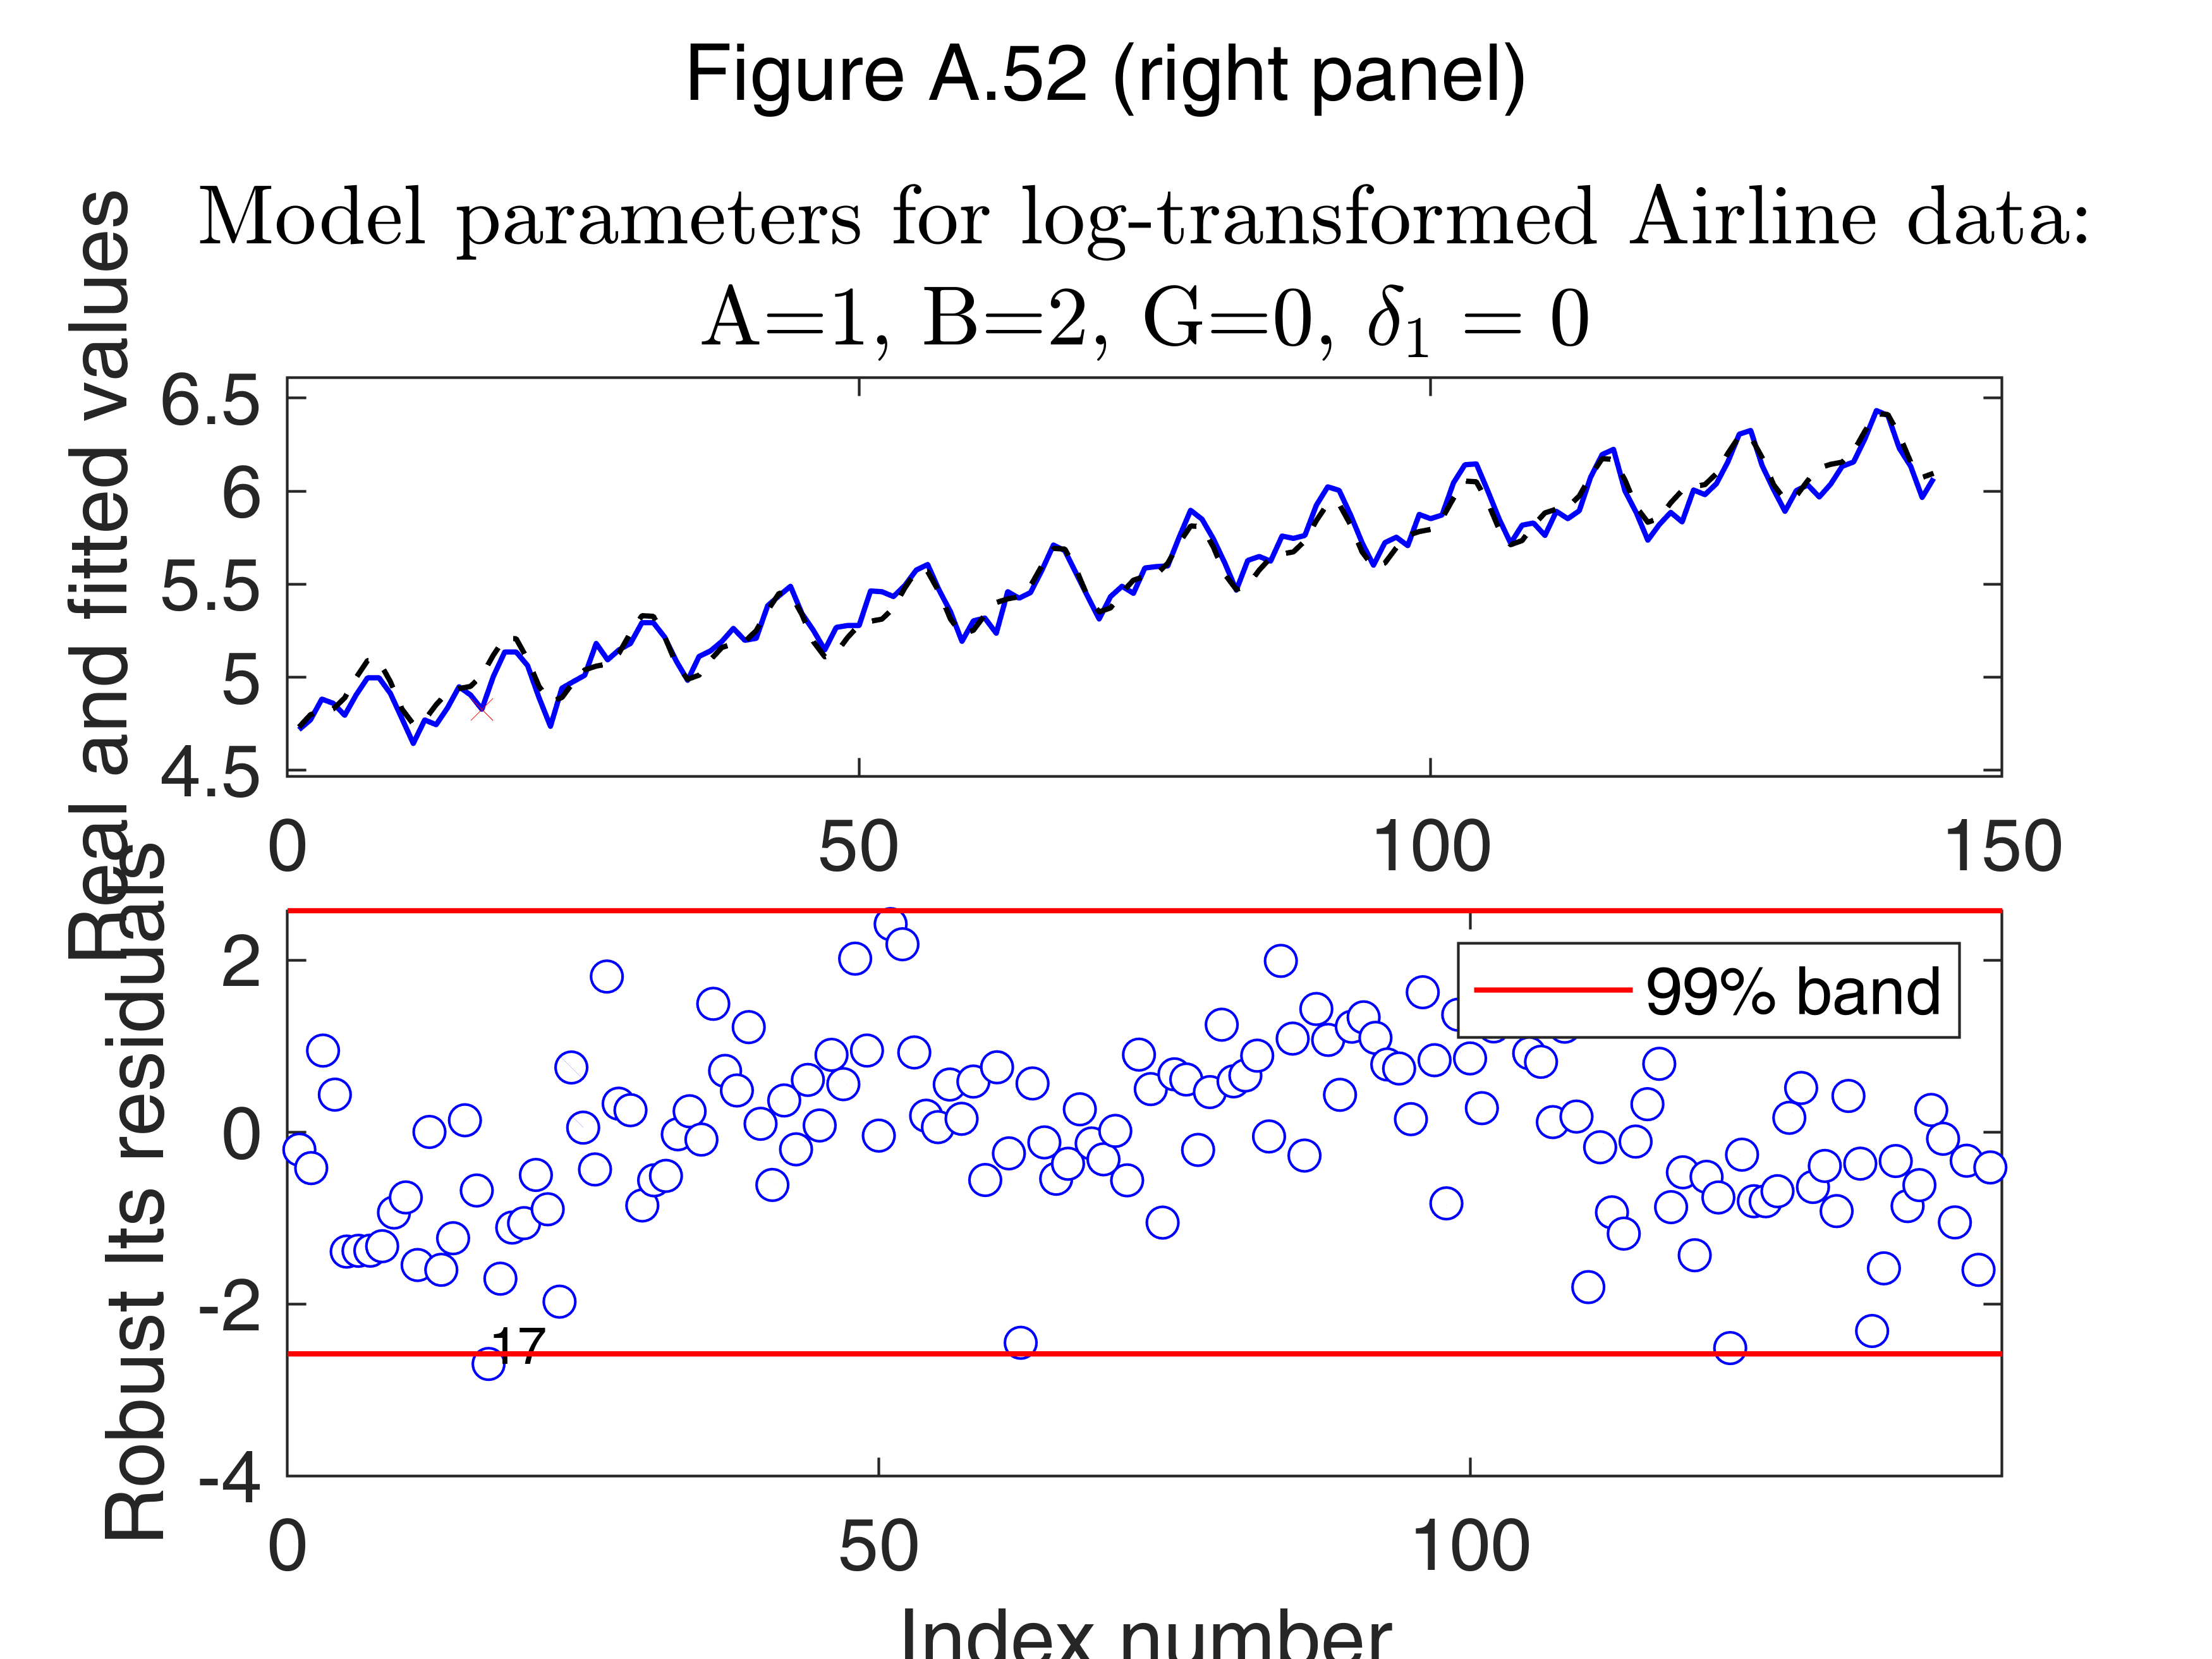

In [10]:
titl = {'Model parameters for log-transformed Airline data:' , 'A=1, B=2, G=0,  !!!EQ_1!!! '};
title(findobj(gcf,'Tag','LTSts:ts'),titl,'interpreter','LaTeX','FontSize',16);

if prin==1
    % print to postscript
    print -depsc ch8_problem5_log2
else
    sgtitle('Figure A.52 (right panel)')
    set(gcf,"Name",'Figure A.52 (right panel)')
end

In [11]:

%InsideREADME